# Customer Segmentation Analysis

**Project:** Customer Segmentation using Mall Customers Dataset  

**Author:** Abdulbaki Aşur

**Date:** August 19, 2024

**Kaggle:** [Customer Segmentation by using Mall Customers Dataset](https://www.kaggle.com/code/abdulbakiaur/customer-segmentation)

---

This project involves analyzing customer behavior and performing segmentation based on the Mall Customers dataset. We apply clustering algorithms like k-Means to identify distinct groups of customers for targeted marketing strategies. The analysis is designed to help optimize marketing efforts by tailoring them to the unique characteristics of each customer segment.

#### Introduction

In this project, we will conduct a customer segmentation analysis using the "Mall Customers" dataset. This dataset includes information about the customers' gender, age, annual income, and spending score which are crucial for market segmentation.

#### Objective

The main objective of this analysis is to segment the customers based on their spending patterns and personal characteristics. We will use clustering algorithms such as k-Means and techniques like k-NN to identify similar groups of customers.

## 1 Data Examination

First, we will load the data and take a preliminary look at the dataset structure and its first few entries to understand the data we will be working with.

In [1]:
# Import necessary libraries
import os
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
print(f"Shape of the dataset: {df.shape}")
print("First two entries of the dataset:")
df.head(2)

Shape of the dataset: (200, 5)
First two entries of the dataset:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


### 1.1 Initial Data Inspection

After loading the data, we will check for missing values and examine the data types of each column to ensure data integrity and appropriateness for further analysis.

In [3]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(df.isnull().sum())

# Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)

Missing values in each column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data types of each column:
CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


### 1.2 Data Cleaning

Before we dive into the analysis, it's crucial to ensure our dataset is clean and ready for use. We'll handle any missing values if present and make sure the data types are suitable for our clustering and classification algorithms.

In [4]:
# If there are missing values, decide how to handle them (e.g., dropping or filling them)
# For demonstration, let's assume we need to fill missing values for 'Annual Income (k$)'
# We'll use the median value of the column to fill any gaps, as it's robust against outliers

# Fill missing values with the median (if any)
if df['Annual Income (k$)'].isnull().any():
    median_income = df['Annual Income (k$)'].median()
    df['Annual Income (k$)'] = df['Annual Income (k$)'].fillna(median_income)

# After handling missing values, confirm that there are no more missing values
print("Updated missing values in each column:")
print(df.isnull().sum())

Updated missing values in each column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### 1.3 Exploratory Data Analysis (EDA)

We will perform an exploratory data analysis to visualize the distributions of key features and the relationships between them. This will help us understand the underlying patterns and prepare for effective customer segmentation.

In [5]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.3.1 Age Distribution

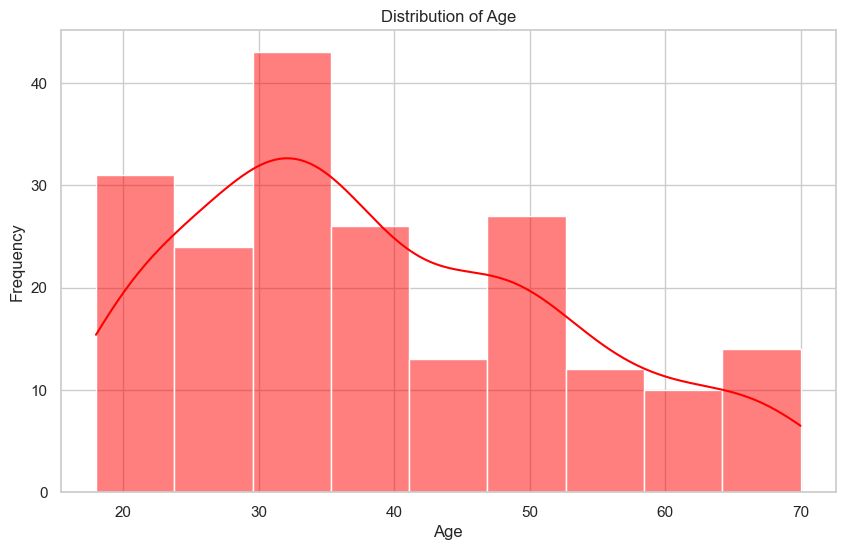

In [6]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='red')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### 1.3.2 Annual Income Distribution

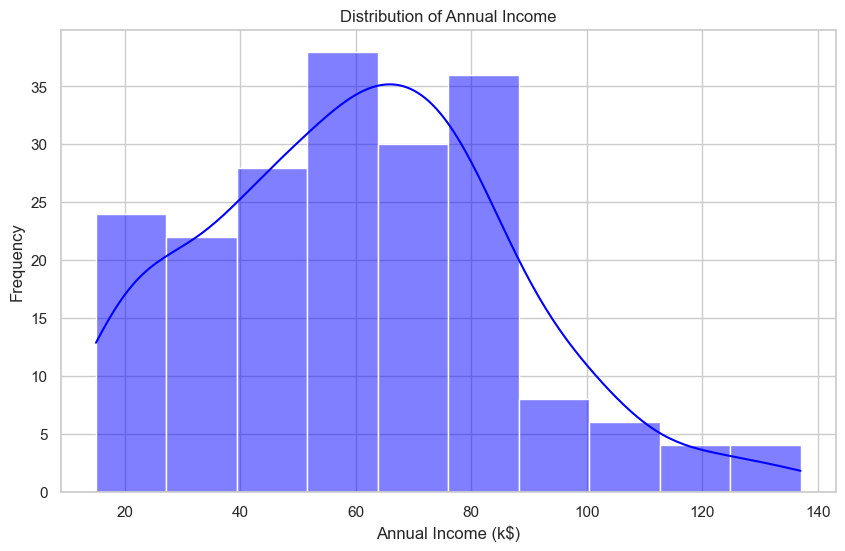

In [7]:
# Plot the distribution of annual income
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, color='blue')
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

The distribution of annual income is relatively uniform with a few peaks, indicating several income groups among the customers. The presence of a peak around the lower income range suggests a significant number of customers with lower annual incomes, which could be an interesting segment for targeted marketing strategies.

#### 1.3.3 Spending Score Distribution

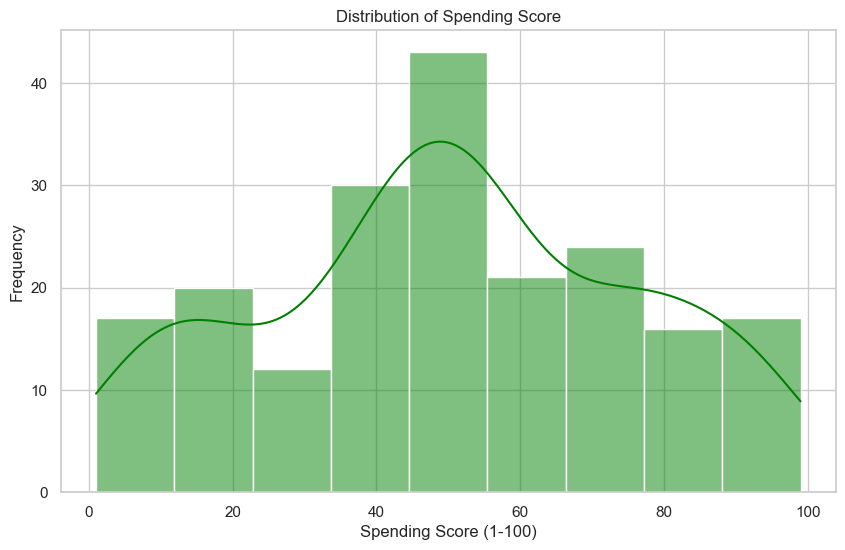

In [8]:
# Plot the distribution of spending score
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, color='green')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

The spending score shows a bi-modal distribution (two peaks in the graph above), suggesting two main groups of customers based on their spending behavior: one group with a low spending score and another with a high spending score. This distinction can be crucial for segmenting customers into high-value and low-value segments, potentially influencing targeted offers and promotions.

## 2. Customer Segmentation by Annual Income and Spending Score

Next, we will apply k-Means clustering to segment our customers based on their annual income and spending scores. Clustering will help us identify distinct groups of customers with similar characteristics, which can be targeted with specific marketing strategies.

Notice that before applying k-Means clustering, it's crucial to scale the features because k-Means is sensitive to the scales of data. Features on larger scales can disproportionately influence the model's outcome. We'll use `StandardScaler` from the `sklearn` library to standardize the `Annual Income (k$)` and `Spending Score (1-100)` to have a mean of zero and a standard deviation of one.

In [9]:
# Importing necessary libraries for scaling and clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# Data preparation for scaling
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

The choice of the number of clusters can initially be based on the **elbow method**, which helps in determining the optimal number of clusters by looking at the total within-cluster sum of square (WCSS) against the number of clusters.

In [11]:
# Determining the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

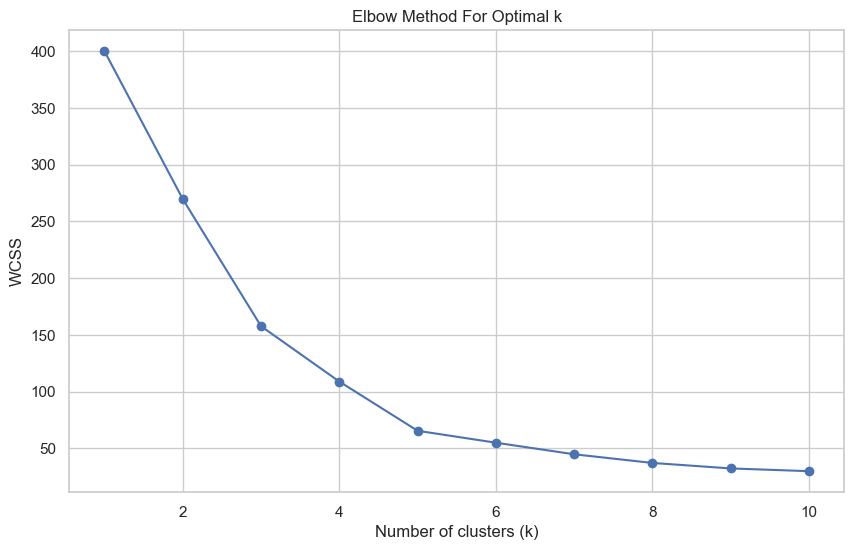

In [12]:
# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

The elbow graph shows a bend around `k=5`, which suggests that having five clusters may be optimal for our customer segmentation. This number provides a good balance between cluster compactness and the number of clusters, offering meaningful segmentation without being too granular.

Now that we've determined the optimal number of clusters, we'll apply the k-Means clustering algorithm with **5** clusters to the scaled features.

In [13]:
# Applying k-Means clustering with the optimal number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_features)
centroids_annual = scaler.inverse_transform(kmeans.cluster_centers_)

# Adding the cluster labels to our dataframe
df['Cluster'] = cluster_labels

# Displaying the first few entries of the dataframe to inspect the cluster labels
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


We will now analyze each cluster to understand the characteristics that define each segment. This analysis will help us in identifying the needs and preferences of different customer groups, enabling us to tailor our marketing strategies accordingly.

To better understand the distribution of clusters, we'll visualize the clusters in the context of annual income and spending score.

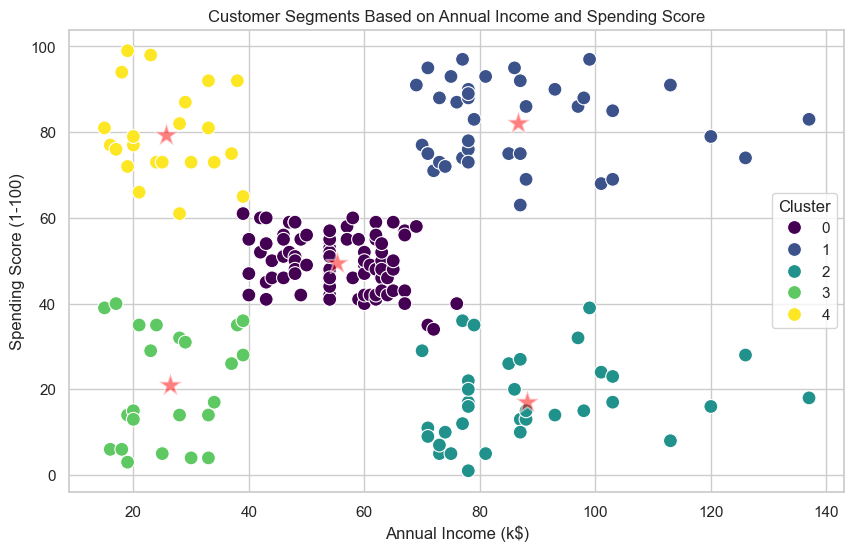

In [14]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
sns.scatterplot(x=centroids_annual[:, 0], y=centroids_annual[:, 1] , s=300 , c='red', alpha=0.5, marker='*')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

After applying k-Means clustering, we have identified five distinct customer segments represented in the scatter plot. Each cluster has unique characteristics based on their annual income and spending score:

##### **Cluster 0 (Moderate Income, Moderate Spending)**
- **Characteristics:** These customers fall in the middle of the income and spending spectrum.
- **Strategy:** Products and services that offer a balance of quality and value might appeal to this segment.

##### **Cluster 1 (High Income, High Spending)**
- **Characteristics:** Customers in this cluster have high annual incomes and also high spending scores.
- **Strategy:** This group is ideal for premium and exclusive product offerings as they are less sensitive to price and more to exclusivity and quality.

##### **Cluster 2 (High Income, Low Spending)**
- **Characteristics:** High income but low spending score customers.
- **Strategy:** These customers could be targeted with investment products and savings plans as they seem to be more conservative with their spending.

##### **Cluster 3 (Low Income, Low Spending)**
- **Characteristics:** This segment includes customers with both low annual income and low spending scores.
- **Strategy:** Cost-effective products and high-volume, low-margin strategies could be effective here.

##### **Cluster 4 (Low Income, High Spending)**
- **Characteristics:** This cluster represents customers with lower annual income but high spending scores.
- **Strategy:** These customers may be looking for value for money or budget-friendly products. Promotions and discounts can be particularly effective.

These insights allow us to tailor specific strategies to meet the distinct needs and preferences of each customer segment, enhancing customer satisfaction and potentially increasing loyalty and revenue.

## 3. Customer Segmentation by Age and Spending Score
We will now perform a clustering analysis to explore how different age groups vary in their spending scores. This analysis will help us understand the spending behavior across various age segments.

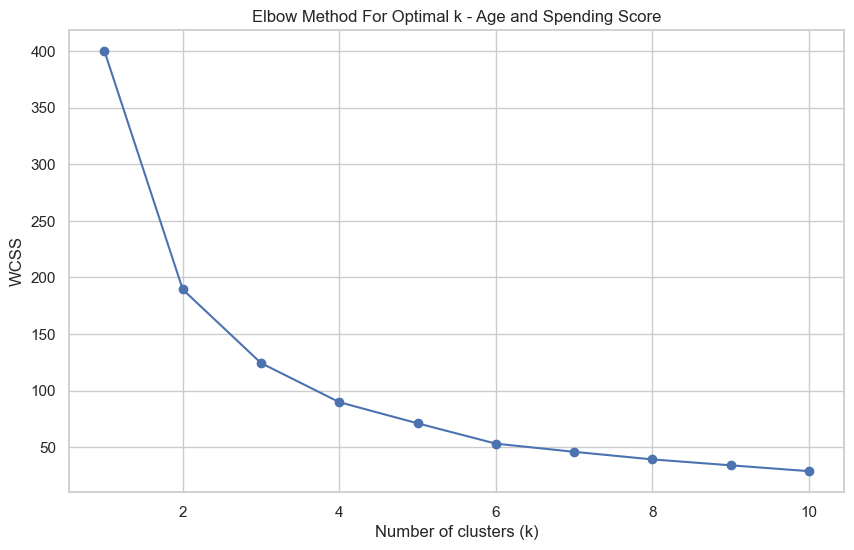

In [15]:
# Data preparation and scaling
features_age_spending = df[['Age', 'Spending Score (1-100)']]
scaler_age_spending = StandardScaler()
scaled_features_age_spending = scaler_age_spending.fit_transform(features_age_spending)

# Determining the optimal number of clusters using the elbow method
wcss_age_spending = []
for i in range(1, 11):
    kmeans_age_spending = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_age_spending.fit(scaled_features_age_spending)
    wcss_age_spending.append(kmeans_age_spending.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_age_spending, marker='o')
plt.title('Elbow Method For Optimal k - Age and Spending Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

The value `k=4` represents a balance between sufficient cluster granularity and the model's complexity. Choosing four clusters allows us to segment the customer base into distinct groups with significant differences in age and spending score, which can be very useful for targeted marketing strategies.

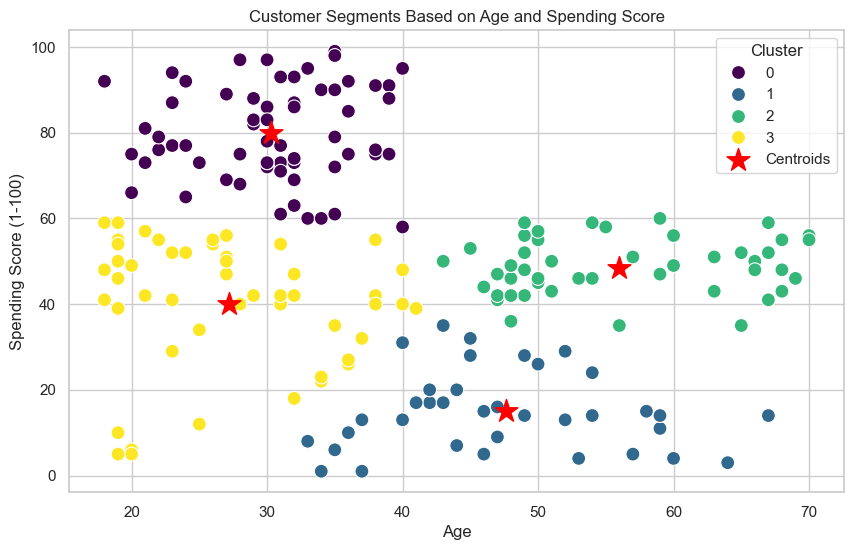

In [16]:
# Applying k-Means clustering with the determined number of clusters
optimal_clusters_age_spending = 4
kmeans_age_spending = KMeans(n_clusters=optimal_clusters_age_spending, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels_age_spending = kmeans_age_spending.fit_predict(scaled_features_age_spending)

# Adding the cluster labels to our dataframe
df['Cluster_Age_Spending'] = cluster_labels_age_spending
centroids_age_spending = scaler_age_spending.inverse_transform(kmeans_age_spending.cluster_centers_)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster_Age_Spending', data=df, palette='viridis', s=100)
plt.scatter(centroids_age_spending[:, 0], centroids_age_spending[:, 1], s=300, c='red', label='Centroids', marker='*')
plt.title('Customer Segments Based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

After applying k-Means clustering with four clusters, we have identified four distinct customer segments based on their age and spending scores. This allows us to tailor marketing strategies that cater to the specific financial behavior and preferences of these different age groups.

##### **Cluster 0 (Young, Moderate to High Spenders)**
- **Characteristics:** This cluster includes younger individuals with moderate to high spending scores.
- **Strategy:** Focusing on trendy and premium lifestyle products can be effective for this group. Digital marketing campaigns and social media engagement are likely to resonate well.

##### **Cluster 1 (Middle-aged, Low Spenders)**
- **Characteristics:** Predominantly middle-aged customers who display low spending habits.
- **Strategy:** Products that offer durability and value for money. Marketing strategies could include value packs and loyalty programs.

##### **Cluster 2 (Older, Moderate Spenders)**
- **Characteristics:** Consisting mostly of older adults with moderate spending scores.
- **Strategy:** Health-related products, comfort and convenience items, and services that enhance quality of life for seniors should be targeted.

##### **Cluster 3 (Younger, Moderate Spenders)**
- **Characteristics:** Young people but generally moderate spenders.
- **Strategy:** Cost-effective and budget-friendly products are key. Promotional deals and discounts could be particularly appealing to this segment.

The clustering analysis reveals that younger individuals generally exhibit higher spending scores compared to older age groups.

### Key Insights:

- **Young Adults (Cluster 0 & Part of Cluster 1):**
  - **High Spending:** Younger individuals, typically aged 20-35, tend to have higher spending scores. They are more influenced by trends and social media, making them ideal targets for premium and trendy products.
  - **Strategy:** Focus on digital marketing, social media campaigns, and offering trendy, high-end products.


- **Middle-aged Adults (Cluster 1 & Cluster 2):**
  - **Moderate Spending:** This group, aged 35-55, shows moderate spending habits, balancing between family responsibilities and personal expenses.
  - **Strategy:** Promote value-driven products, loyalty programs, and durable goods that appeal to their practical needs.

- **Older Adults (Cluster 2 & Cluster 3):**
  - **Low Spending:** Individuals aged 55 and above tend to have lower spending scores, likely due to fixed incomes and a focus on essential needs.
  - **Strategy:** Offer health-related products, comfort items, and budget-friendly options, with targeted discounts and promotions.

If your business aims for rapid growth and a trendy brand image, focusing on young adults (20-35 years) would be most beneficial. However, for stable, long-term growth and customer loyalty, middle-aged adults (35-55 years) should be your primary focus.

## 4. Clustering Based on Age, Annual Income, and Spending Score

Now we will perform 3D clustering using the k-Means algorithm, considering Age, Annual Income, and Spending Score as the features. This comprehensive segmentation allows us to understand customer behavior across multiple dimensions. We will use the same steps above.

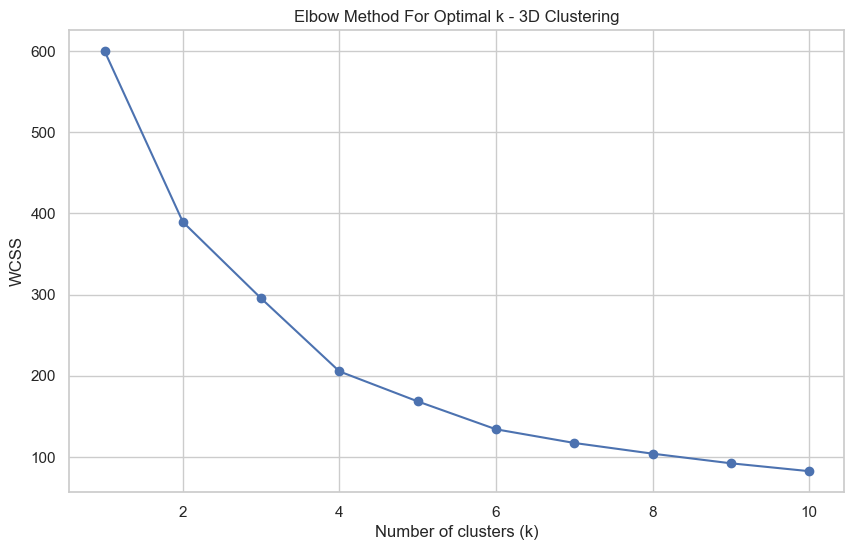

In [17]:
# Scaling the data for Age, Annual Income, and Spending Score
from sklearn.preprocessing import StandardScaler
features_3d = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler_3d = StandardScaler()
scaled_features_3d = scaler_3d.fit_transform(features_3d)

# Determining the optimal number of clusters using the elbow method
wcss_3d = []
for i in range(1, 11):
    kmeans_3d = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_3d.fit(scaled_features_3d)
    wcss_3d.append(kmeans_3d.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_3d, marker='o')
plt.title('Elbow Method For Optimal k - 3D Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [18]:
import plotly.graph_objects as go

# Applying k-Means clustering with k=4
optimal_clusters_3d = 4
kmeans_3d = KMeans(n_clusters=optimal_clusters_3d, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels_3d = kmeans_3d.fit_predict(scaled_features_3d)

# Adding the cluster labels to our dataframe
df['Cluster_3D'] = cluster_labels_3d

# Inverse transforming the centroids to their original scale
centroids_3d = scaler_3d.inverse_transform(kmeans_3d.cluster_centers_)

# Creating the figure
fig = go.Figure()

# Adding clusters to the figure
for cluster in range(optimal_clusters_3d):
    cluster_data = df[df['Cluster_3D'] == cluster]
    fig.add_trace(go.Scatter3d(x=cluster_data['Age'], y=cluster_data['Annual Income (k$)'], 
                               z=cluster_data['Spending Score (1-100)'],
                               mode='markers',
                               name=cluster,
                               marker=dict(size=5)))

# Adding centroids to the figure (but not to the legend)
fig.add_trace(go.Scatter3d(x=centroids_3d[:, 0], y=centroids_3d[:, 1], z=centroids_3d[:, 2],
                           mode='markers', marker=dict(size=10, color='yellow', symbol='x'),
                           showlegend=False))

# Updating the layout
fig.update_layout(scene=dict(
                    xaxis_title='Age',
                    yaxis_title='Annual Income (k$)',
                    zaxis_title='Spending Score (1-100)'),
                  height=800,
                  width=1000,
                  title='3D Customer Segmentation with k=4')

# Show the plot
fig.show()

From the figure above, we can derive the following insights:

**Cluster 0:** While these individuals have high earning potential, their lower spending scores suggest that they are cautious spenders. Focusing on long-term value propositions, such as investment opportunities or savings plans, might better resonate with this segment.

**Cluster 1:** Despite having lower incomes, these individuals have a relatively high spending score, indicating a willingness to spend when they perceive value. Discounts, promotions, and budget-friendly yet appealing products should be the focus when targeting this group.

**Cluster 2:** This segment has moderate income and spending behavior, making it an ideal target for products that offer a balance of quality and affordability. Promotions that highlight value-for-money and durability could be effective.

**Cluster 3:** This segment is the most profitable, with high income and a strong inclination to spend. Marketing efforts should prioritize premium products, exclusive services, and personalized experiences to maximize revenue from this group.

## 5. Conclusion and Summary

These targeted strategies can help in driving customer engagement, satisfaction, and overall profitability. The insights gained from this segmentation are crucial for developing effective marketing campaigns and optimizing customer lifetime value.